## Preprocessing MNIST 

In [1]:
import pickle
import gzip
from PIL import Image
import os
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse
import seaborn as sn
from keras.utils import to_categorical

/Users/abhavluthra/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

In [3]:
X_train = training_data[0]
Y_train = training_data[1]
X_val = validation_data[0]
Y_val = validation_data[1]
X_test = test_data[0]
Y_test = test_data[1]

print('MNIST Train Shape', X_train.shape)
print('MNIST Train Target Shape', Y_train.shape)
print('MNIST Validation Shape', X_val.shape)
print('MNIST Validation Target Shape', Y_val.shape)
print('MNIST Test Shape', X_test.shape)
print('MNIST Test Target Shape', Y_test.shape)

MNIST Train Shape (50000, 784)
MNIST Train Target Shape (50000,)
MNIST Validation Shape (10000, 784)
MNIST Validation Target Shape (10000,)
MNIST Test Shape (10000, 784)
MNIST Test Target Shape (10000,)


## Preprocessing USPS 

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('USPSdata.zip', 'r')
zip_ref.extractall('USPSdata')
zip_ref.close()

In [4]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

In [5]:
USPSMat
UPSPS_f = np.asarray(USPSMat)
UPSPS_target = np.asarray(USPSTar)

print('UPS Feature Data', UPSPS_f.shape)
print('UPS Target Data', UPSPS_target.shape)

UPS Feature Data (19999, 784)
UPS Target Data (19999,)


# Logistic Regression

In [6]:
total = 0
for i in range(10):
    print ("digit", i, "appear", np.count_nonzero(Y_train == i), "times")

digit 0 appear 4932 times
digit 1 appear 5678 times
digit 2 appear 4968 times
digit 3 appear 5101 times
digit 4 appear 4859 times
digit 5 appear 4506 times
digit 6 appear 4951 times
digit 7 appear 5175 times
digit 8 appear 4842 times
digit 9 appear 4988 times


In [14]:
def softMax(x):
    x = x - np.max(x)
    sm = (np.exp(x).T / np.sum(np.exp(x),axis=1)).T
    return sm

def oneHotEncoding(Y):
    Y = to_categorical(Y)
    return Y

def findGrad_Loss(w,x,y,lam):
    #Calculate batch Size
    batch_size = x.shape[0] 
    # Perform one-hot encoding on target values
    y_mat = oneHotEncoding(y) 
    # calculate h
    scores = np.dot(x,w) 
    #Perform softmax on h to get their probabilities
    prob = softMax(scores)
    #Calculate loss
    loss = (-1 / batch_size) * np.sum(y_mat * np.log(prob)) + (lam/2)*np.sum(w*w)
    # Calculate Gradient Descent
    grad = (-1 / batch_size) * np.dot(x.T,(y_mat - prob)) + lam*w 
    return loss,grad

def predictValue(X,w):
    pred = softMax(np.dot(X,w))
    pred = np.argmax(pred,axis=1)
    return pred

def findAccuracy(X,Y,w):
    pred = predictValue(X,w)
    right = 0
    for i in range(0, X.shape[0]):
        if (pred[i] == Y[i]):
            right = right + 1

    accuracy = right/X.shape[0]
    return accuracy

### Gradient Descent

In [19]:
w = np.zeros([X_train.shape[1],10])
lam = 1
iterations = 25
learningRate = 0.01
losses = []
p = []
w_history = np.zeros([X_train.shape[1],10])

for i in range(0,500):
    loss,grad = findGrad_Loss(w,X_train,Y_train,lam)
    w = w - (learningRate * grad)
    losses.append(loss)
    if i%100 == 0:
        print('iterations: ' + str(i) + '  loss: ' + str(loss))

iterations: 0  loss: 2.3025850929940437
iterations: 100  loss: 1.9445379927238398
iterations: 200  loss: 1.9212302990077688
iterations: 300  loss: 1.919615441546842
iterations: 400  loss: 1.919494075790459


## Mini batch Gradient Descent

In [15]:
w = np.zeros([X_train.shape[1],10])
lam = 1
iterations = 25
learningRate = 0.01
losses = []
p = []

for i in range(0,400):
    w_history = np.zeros([X_train.shape[1],10])
    for j in range(0, 250):
        loss,grad = findGrad_Loss(w,X_train[j*200:(j+1)*200],Y_train[j*200:(j+1)*200],lam)
        k = w - (learningRate * grad)
        w_history = w_history + k
    w = w_history/250
    losses.append(loss)
    if i%100 == 0:
        print('iterations: ' + str(i) + '  loss: ' + str(loss))

iterations: 0  loss: 2.3025850929940455
iterations: 100  loss: 1.996911939888463
iterations: 200  loss: 1.9844009629537842
iterations: 300  loss: 1.985402336135089


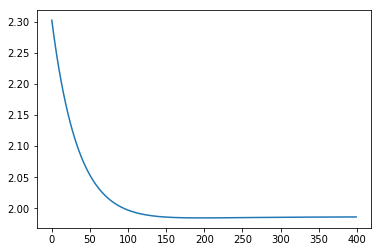

In [16]:
plt.plot(losses)

In [17]:
print('Training Accuracy: ', findAccuracy(X_train,Y_train,w))
print('Test Accuracy: ', findAccuracy(X_test,Y_test,w))
print('Validation Accuracy: ', findAccuracy(X_val,Y_val,w))
print('UPSPS Accuracy: ', findAccuracy(UPSPS_f,UPSPS_target,w))

Training Accuracy:  0.78222
Test Accuracy:  0.798
Validation Accuracy:  0.805
UPSPS Accuracy:  0.28921446072303614


In [18]:
Y_train_pred = predictValue(X_train,w)
Y_test_pred  = predictValue(X_test,w)
Y_val_pred   = predictValue(X_val,w)
UPSPS_target_pred = predictValue(UPSPS_f,w)


Confusion matrix for Training


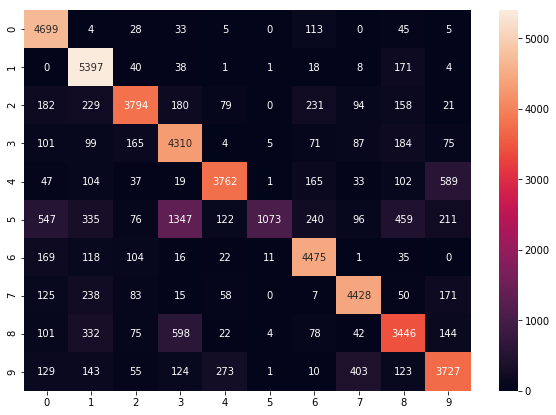

In [21]:
cm=metrics.confusion_matrix(Y_train,Y_train_pred)
print("\nConfusion matrix for Training")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")


Confusion matrix for Validation


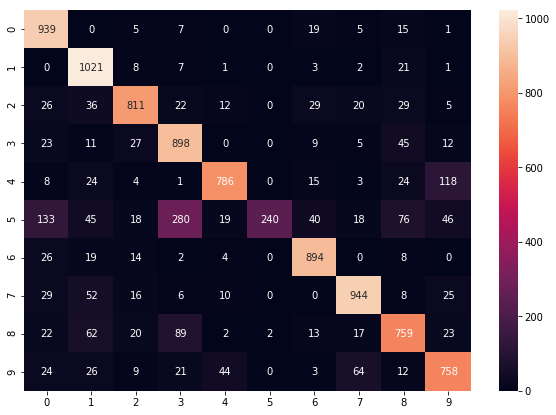

In [22]:
cm=metrics.confusion_matrix(Y_val,Y_val_pred)
print("\nConfusion matrix for Validation")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")


Confusion matrix for Testing


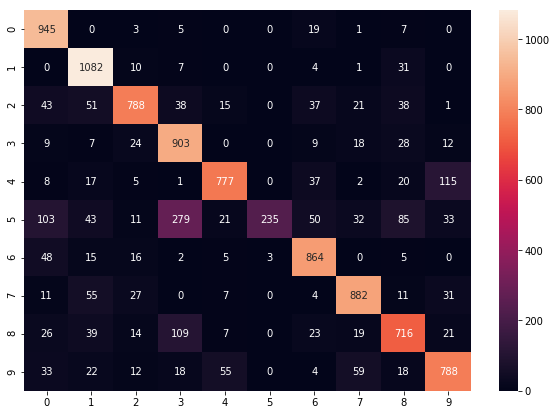

In [23]:
cm=metrics.confusion_matrix(Y_test,Y_test_pred)
print("\nConfusion matrix for Testing")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")


Confusion matrix for USPS


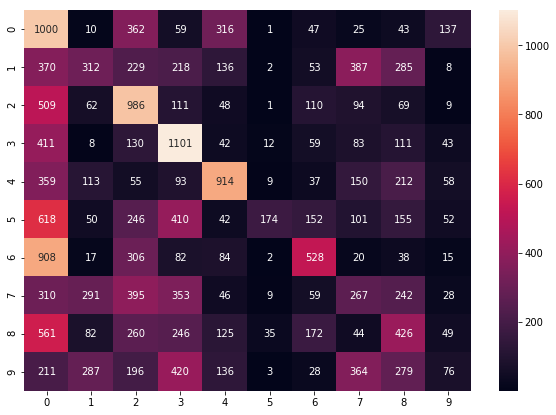

In [24]:
cm=metrics.confusion_matrix(UPSPS_target,UPSPS_target_pred)
print("\nConfusion matrix for USPS")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

In [13]:
np.savetxt('LR_MNIST_Train.csv',Y_train_pred, delimiter=",")
np.savetxt('LR_MNIST_Test.csv',Y_test_pred, delimiter=",")
np.savetxt('LR_MNIST_Val.csv',Y_val_pred, delimiter=",")
np.savetxt('LR_MNIST_UPSPS.csv',UPSPS_target_pred, delimiter=",")

# RandomForest Classifier

### Tree Size = 5 

In [38]:
classifier2 = RandomForestClassifier(n_estimators = 5);
classifier2.fit(X_train, Y_train)
classifier2.score(X_train, Y_train)

0.99348

In [39]:
predicted = classifier2.predict(X_val)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted))

predicted = classifier2.predict(X_test)
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted))

predicted = classifier2.predict(UPSPS_f)
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted))

Accuracy: 0.9204 for Validation
Accuracy: 0.9188 for Test
Accuracy: 0.2699 for UPSPS


### Tree Size = 10

In [30]:
classifier2 = RandomForestClassifier(n_estimators = 10);
classifier2.fit(X_train, Y_train)
classifier2.score(X_train, Y_train)

0.99928

In [31]:
predicted = classifier2.predict(X_val)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted))

predicted = classifier2.predict(X_test)
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted))

predicted = classifier2.predict(UPSPS_f)
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted))

Accuracy: 0.9498 for Validation
Accuracy: 0.9431 for Test
Accuracy: 0.3072 for UPSPS


### Tree Size = 15

In [32]:
classifier2 = RandomForestClassifier(n_estimators = 15);
classifier2.fit(X_train, Y_train)
classifier2.score(X_train, Y_train)

0.99966

In [33]:
predicted = classifier2.predict(X_val)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted))

predicted = classifier2.predict(X_test)
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted))

predicted = classifier2.predict(UPSPS_f)
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted))

Accuracy: 0.9581 for Validation
Accuracy: 0.9539 for Test
Accuracy: 0.3355 for UPSPS


### Tree Size = 20

In [34]:
classifier2 = RandomForestClassifier(n_estimators = 20);
classifier2.fit(X_train, Y_train)
classifier2.score(X_train, Y_train)

0.9999

In [35]:
predicted = classifier2.predict(X_val)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted))

predicted = classifier2.predict(X_test)
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted))

predicted = classifier2.predict(UPSPS_f)
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted))

Accuracy: 0.9613 for Validation
Accuracy: 0.9567 for Test
Accuracy: 0.3429 for UPSPS


### Tree Size = 50

In [21]:
classifier2 = RandomForestClassifier(n_estimators = 50);
classifier2.fit(X_train, Y_train)
classifier2.score(X_train, Y_train)

1.0

In [22]:
predicted1 = classifier2.predict(X_val)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted1))

predicted2 = classifier2.predict(X_test)
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted2))

predicted3 = classifier2.predict(UPSPS_f)
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted3))

Accuracy: 0.9695 for Validation
Accuracy: 0.9661 for Test
Accuracy: 0.3838 for UPSPS



Confusion matrix for Validation


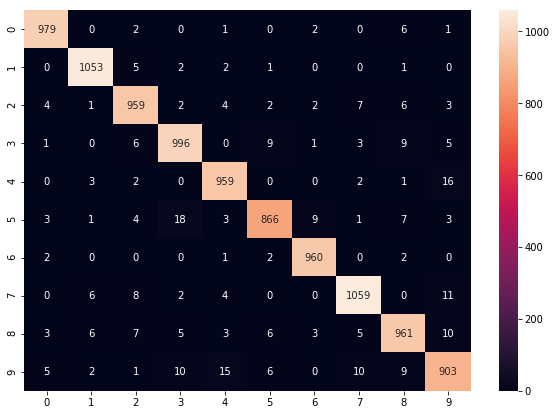

In [23]:
cm=metrics.confusion_matrix(Y_val,predicted1)
print("\nConfusion matrix for Validation")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")


Confusion matrix for Test


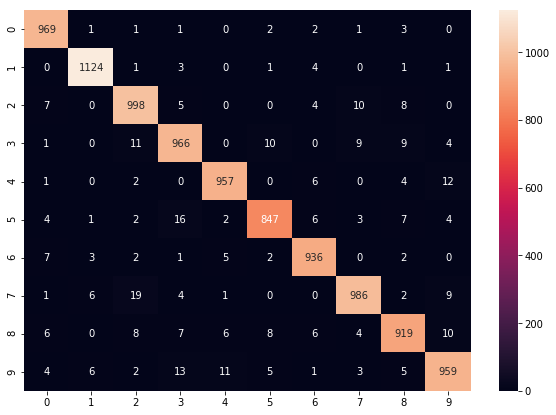

In [24]:
cm=metrics.confusion_matrix(Y_test,predicted2)
print("\nConfusion matrix for Test")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")


Confusion matrix for UPSPS


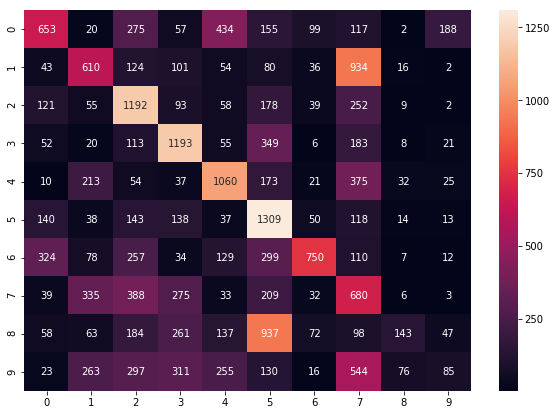

In [25]:
cm=metrics.confusion_matrix(UPSPS_target,predicted3)
print("\nConfusion matrix for UPSPS")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

In [26]:
predicted = classifier2.predict(X_train)
np.savetxt('RF_MNIST_Train.csv',predicted, delimiter=",")
np.savetxt('RF_MNIST_Test.csv',predicted2, delimiter=",")
np.savetxt('RF_MNIST_Val.csv',predicted1, delimiter=",")
np.savetxt('RF_MNIST_UPSPS.csv',predicted3, delimiter=",")

### Tree Size = 100

In [40]:
classifier2 = RandomForestClassifier(n_estimators = 100);
classifier2.fit(X_train, Y_train)
classifier2.score(X_train, Y_train)

1.0

In [41]:
predicted = classifier2.predict(X_val)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted))

predicted = classifier2.predict(X_test)
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted))

predicted = classifier2.predict(UPSPS_f)
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted))

Accuracy: 0.9721 for Validation
Accuracy: 0.9684 for Test
Accuracy: 0.3906 for UPSPS


### Tree Size = 200 

In [42]:
classifier2 = RandomForestClassifier(n_estimators = 200);
classifier2.fit(X_train, Y_train)
classifier2.score(X_train, Y_train)

1.0

In [43]:
predicted = classifier2.predict(X_val)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted))

predicted = classifier2.predict(X_test)
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted))

predicted = classifier2.predict(UPSPS_f)
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted))

Accuracy: 0.9745 for Validation
Accuracy: 0.9688 for Test
Accuracy: 0.3983 for UPSPS
